In [1]:
import sklearn
import torch.optim.optimizer
from sklearn import tree
import os
import numpy as np
import pandas as pd
import kcu as utils
import matplotlib.pyplot as plt
import seaborn as sns
import torch.optim as optim


cwdir = os.getcwd()
trainfile = cwdir + "/../../data/Titanic/train.csv"
testfile = cwdir + "/../../data/Titanic/test.csv"
train_data_pd = pd.read_csv(trainfile)

# Plot some samples:
print(train_data_pd.head())

# lets get some statistics
train_data_pd.describe()

profile = utils.utils.report_dataframe(train_data_pd)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
profile.to_widgets()

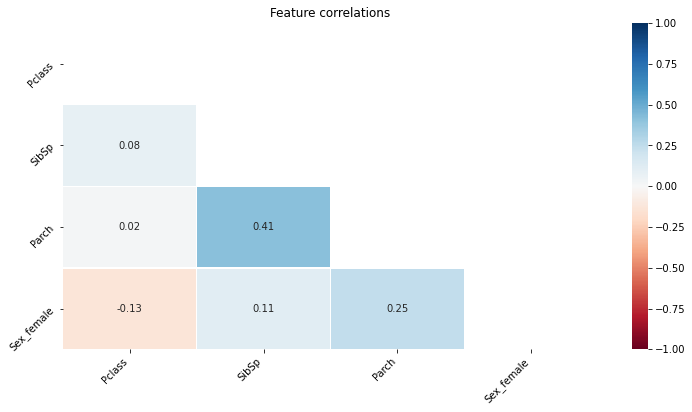

In [2]:
# This report gives us a lot of information, namely:
# * "Name" has many different values
# * There are several strong/significant correlations
# * IDs are unique (can be neglected as features) -> Feature selection

features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X_train = pd.get_dummies(train_data_pd[features])
# Lets drop one of the two columns "Sex_male"/"Sex_female" as there is no information gain
X_train = X_train.drop("Sex_male", axis=1)
Y_train = train_data_pd['Survived']

#multi_corr = utils.utils.multiple_correlation(train_data_pd[['Pclass', 'SibSp', 'Parch', "Survived"]], "Survived")
#plt.show()

utils.utils.correlation_matrix(pd.DataFrame(X_train))

kNN scores:  [0.7150838  0.73033708 0.75280899 0.78651685 0.78651685]
SVM scores:  [0.80446927 0.80337079 0.78651685 0.75280899 0.78651685]


/home/florian/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/florian/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/florian/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/florian/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) re

MLP scores:  [0.72067039 0.7752809  0.80337079 0.80337079 0.79213483]
DecisionTree scores:  [0.77653631 0.79213483 0.80898876 0.79775281 0.81460674]
RandomForest scores:  [0.76536313 0.79213483 0.79213483 0.79213483 0.8258427 ]
AdaBoost scores:  [0.7877095  0.80337079 0.80898876 0.79213483 0.79213483]


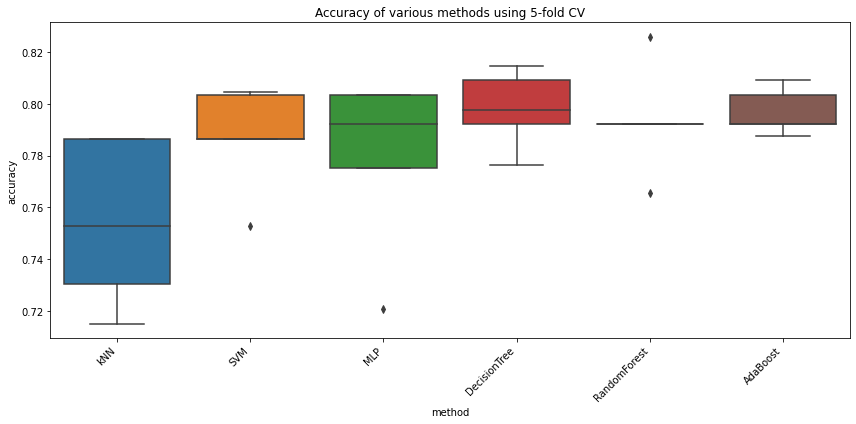

In [6]:
#utils.boilerplates.determine_durations(len(X_train.columns), 10000, sklearn.svm.SVC())

train_inds, val_inds = sklearn.model_selection.train_test_split(
    np.arange(len(Y_train)), test_size=0.2
)
train_X, val_X = X_train.iloc[train_inds], X_train.iloc[val_inds]
train_Y, val_Y = Y_train.iloc[train_inds], Y_train.iloc[val_inds]

# Try several classifiers using kFold CrossValidation
performances = utils.boilerplates.run_several_classifiers(X_train, Y_train, cv=True)

# Lets report their performances
chart = sns.boxplot(x="method", y="accuracy", data=performances)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Accuracy of various methods using 5-fold CV")
plt.tight_layout()
plt.show()

Test Error: 
 Accuracy: 41.9%, Avg loss: 0.008953 

Test Error: 
 Accuracy: 43.6%, Avg loss: 0.008254 

Test Error: 
 Accuracy: 70.9%, Avg loss: 0.007590 

Test Error: 
 Accuracy: 73.7%, Avg loss: 0.006948 

Test Error: 
 Accuracy: 74.3%, Avg loss: 0.006448 

Test Error: 
 Accuracy: 78.8%, Avg loss: 0.006087 

Test Error: 
 Accuracy: 80.4%, Avg loss: 0.005832 

Test Error: 
 Accuracy: 80.4%, Avg loss: 0.005621 

Test Error: 
 Accuracy: 80.4%, Avg loss: 0.005440 

Test Error: 
 Accuracy: 80.4%, Avg loss: 0.005307 

Test Error: 
 Accuracy: 80.4%, Avg loss: 0.005198 

Test Error: 
 Accuracy: 80.4%, Avg loss: 0.005119 

Test Error: 
 Accuracy: 81.0%, Avg loss: 0.005040 

Test Error: 
 Accuracy: 81.0%, Avg loss: 0.004951 

Test Error: 
 Accuracy: 81.6%, Avg loss: 0.004912 

Test Error: 
 Accuracy: 81.6%, Avg loss: 0.004878 

Test Error: 
 Accuracy: 81.6%, Avg loss: 0.004854 

Test Error: 
 Accuracy: 81.6%, Avg loss: 0.004821 

Test Error: 
 Accuracy: 81.6%, Avg loss: 0.004793 

Test Error: 

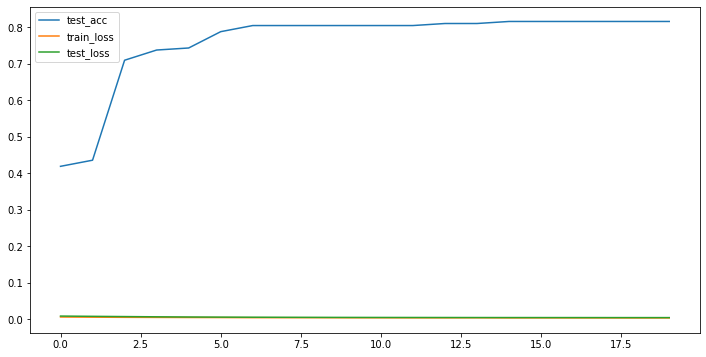

In [12]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = utils.models.ResNet.make_baseline(
     d_in=4,
     d=16,
     d_intermidiate=16,
     dropout_first=0.2,
     dropout_second=0.0,
     n_blocks=2,
     d_out=2
).to(device)
lr = 0.001
weight_decay = 0.0

optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

train_dset = TensorDataset(torch.Tensor(train_X.to_numpy()),
                           torch.Tensor(train_Y.to_numpy()).long()) # create your datset
train_loader = DataLoader(train_dset, batch_size=128, shuffle=True)
val_dset = TensorDataset(torch.Tensor(val_X.to_numpy()),
                         torch.Tensor(val_Y.to_numpy()).long()) # create your datset
val_loader = DataLoader(val_dset, batch_size=128, shuffle=False)

utils.boilerplates.train_classifier(model, optimizer, train_loader,
                                    device, 20, nn.CrossEntropyLoss(), val_loader, True)